## Region Filling

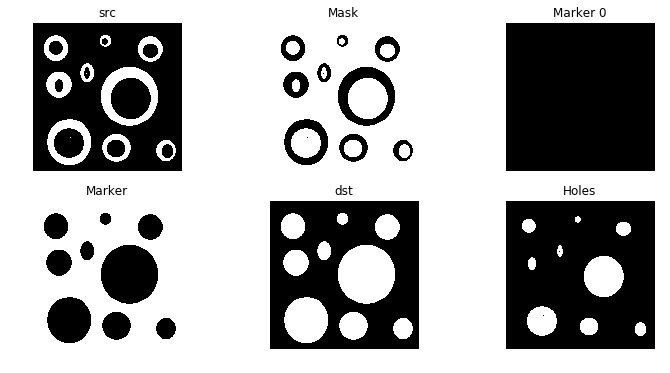

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline
img = cv.imread("./img/regionfilling.jpg")

# 二值化
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgray[imgray < 100] = 0
imgray[imgray >= 100] = 255

# 原图取补得到MASK图像
mask = 255 - imgray

# 构造Marker图像
marker = np.zeros_like(imgray)
marker[0, :] = 255
marker[-1, :] = 255
marker[:, 0] = 255
marker[:, -1] = 255
marker_0 = marker.copy()

# 形态学重建
SE = cv.getStructuringElement(shape=cv.MORPH_CROSS, ksize=(3, 3))
while True:
    marker_pre = marker
    dilation = cv.dilate(marker, kernel=SE)
    marker = np.min((dilation, mask), axis=0)
    if (marker_pre == marker).all():
        break
dst = 255 - marker
filling = dst - imgray

# 显示
plt.figure(figsize=(12, 6))  # width * height
plt.subplot(2, 3, 1), plt.imshow(imgray, cmap='gray'), plt.title('src'), plt.axis("off")
plt.subplot(2, 3, 2), plt.imshow(mask, cmap='gray'), plt.title('Mask'), plt.axis("off")
plt.subplot(2, 3, 3), plt.imshow(marker_0, cmap='gray'), plt.title('Marker 0'), plt.axis("off")
plt.subplot(2, 3, 4), plt.imshow(marker, cmap='gray'), plt.title('Marker'), plt.axis("off")
plt.subplot(2, 3, 5), plt.imshow(dst, cmap='gray'), plt.title('dst'), plt.axis("off")
plt.subplot(2, 3, 6), plt.imshow(filling, cmap='gray'), plt.title('Holes'), plt.axis("off")
plt.show()